In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
dows30 = yf.Ticker("^DJI")
nasdaq = yf.Ticker("^IXIC")
sptsx = yf.Ticker("^GSPTSE")
sp500_data = sp500.history(start= start, actions=False)
dows30_data = dows30.history(start = start)
nasdaq_data = nasdaq.history(start= start)
sptsx_data = sptsx.history(start= start)

In [4]:
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [11]:
# Fidelity funds Information and historical closing price since January 2018
fid_us_stocks = yf.Ticker("0P0001364K.TO")
fid_us_stocks_data = fid_us_stocks.history(start = start, actions=False)
fid_us_equity = yf.Ticker("0P000074PP.TO")
fid_us_equity_data = fid_us_equity.history(start = start, actions=False)
# NEI funds ...
nei_us_equity_rs = yf.Ticker("0P000070LH.TO")
nei_us_equity_rs_data = nei_us_equity_rs.history(start = start, actions=False)
# Invesco funds ...
aim_us_companies = yf.Ticker("0P000072U5.TO")
aim_us_companies_data = aim_us_companies.history(start = start, actions=False)
#CIBC funds ...
cibc_us_equity = yf.Ticker("0P000077O0.TO")
cibc_us_equity_data = cibc_us_equity.history(start = start, actions=False)
#RBC funds ...
rbc_us_equity = yf.Ticker("RBCUSEQUITYS.TO")
rbc_us_equity_data = rbc_us_equity.history(start = start, actions=False)
#Scotia funds ...
scotia_us_equity = yf.Ticker("0P000070D4.TO")
scotia_us_equity_data = scotia_us_equity.history(start = start, actions=False)
#BMO funds ...
bmo_us_equity = yf.Ticker("0P00014EDS.TO")
bmo_us_equity_data = bmo_us_equity.history(start = start, actions=False)
#Sunlife Funds
sunlife_us_growth = yf.Ticker("0P00015ILM.TO")
sunlife_us_growth_data = sunlife_us_growth.history(start = start, actions=False)
#Mawer Funds
mawer_us_equity = yf.Ticker("0P0000716B.TO")
mawer_us_equity_data = mawer_us_equity.history(start = start, actions=False)

In [12]:
# Drop extra columns - Open, High, Low, Volume

fid_us_stocks_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
fid_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
nei_us_equity_rs_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
aim_us_companies_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
cibc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
rbc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
scotia_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bmo_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
sunlife_us_growth_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
mawer_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)




In [13]:
mawer_us_equity_data.count()

Close    934
dtype: int64

In [14]:
# Combine into single df using concat function -excluding RBC for now - only 16 data points
daily_close_df = pd.concat([fid_us_stocks_data, fid_us_equity_data, nei_us_equity_rs_data, aim_us_companies_data, cibc_us_equity_data, scotia_us_equity_data, bmo_us_equity_data, sunlife_us_growth_data, mawer_us_equity_data, sp500_data], axis="columns", join="inner")

In [15]:
columns = ["FID US Stocks", "FID US Equity", "NEI US Equity RS", "AIM US Companies", "CIBC US Equity", "Scotia US Equity", "BMO US Equity", "Sunlife US Growth", "Mawer US Equity", "S&P500"]
daily_close_df.columns=(columns)


In [24]:
daily_returns = daily_close_df.pct_change()

<AxesSubplot:xlabel='Date'>

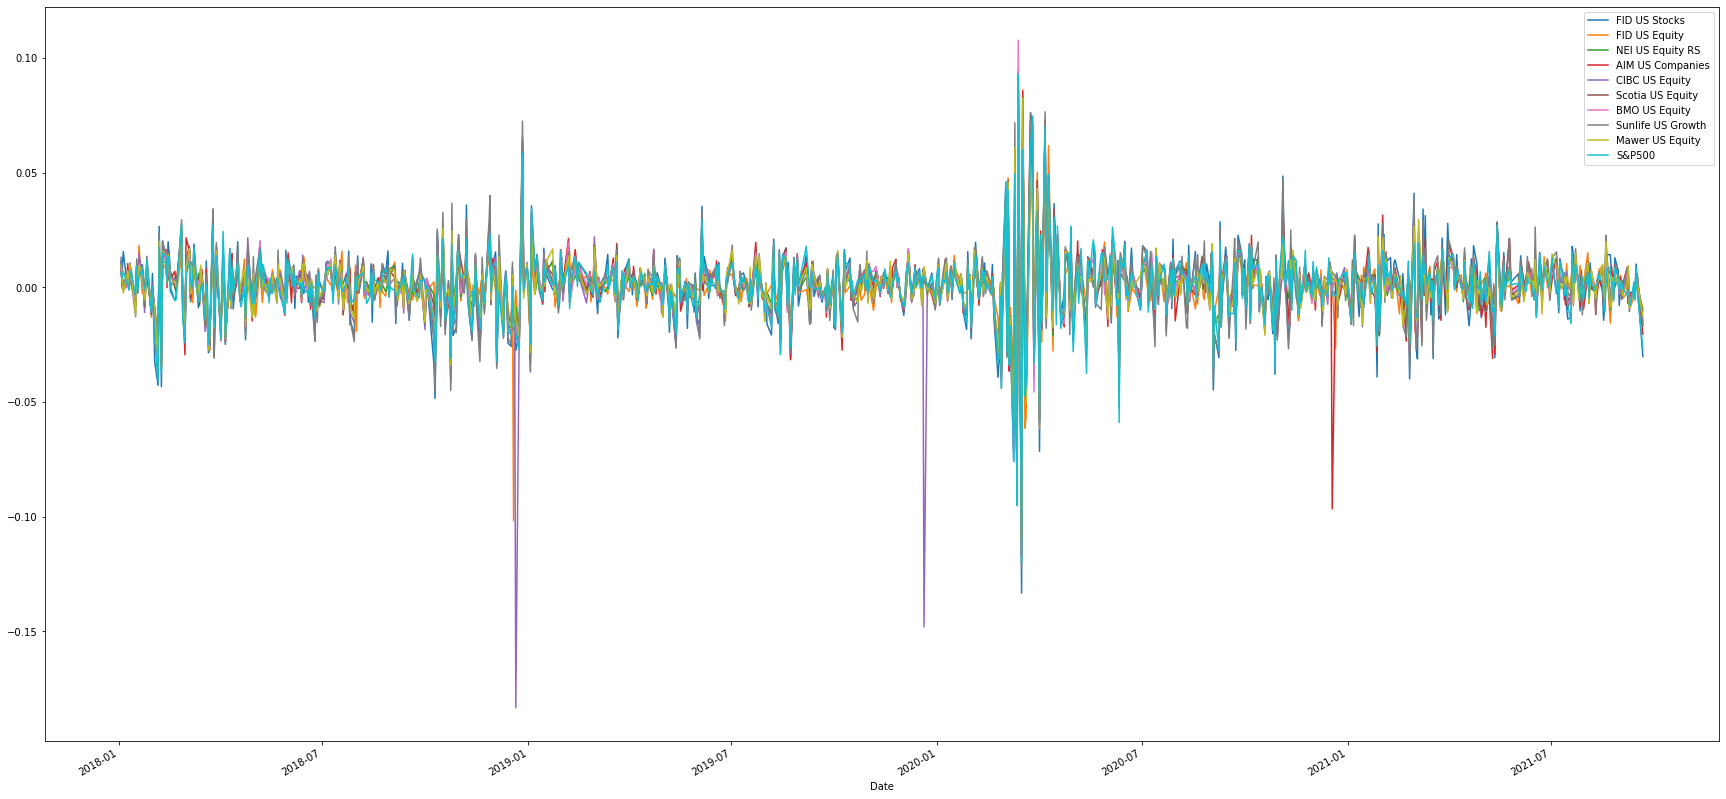

In [31]:
daily_returns.plot(figsize=(30,15))


In [38]:
growth_10k = (1 + daily_returns) * 10000


<AxesSubplot:xlabel='Date'>

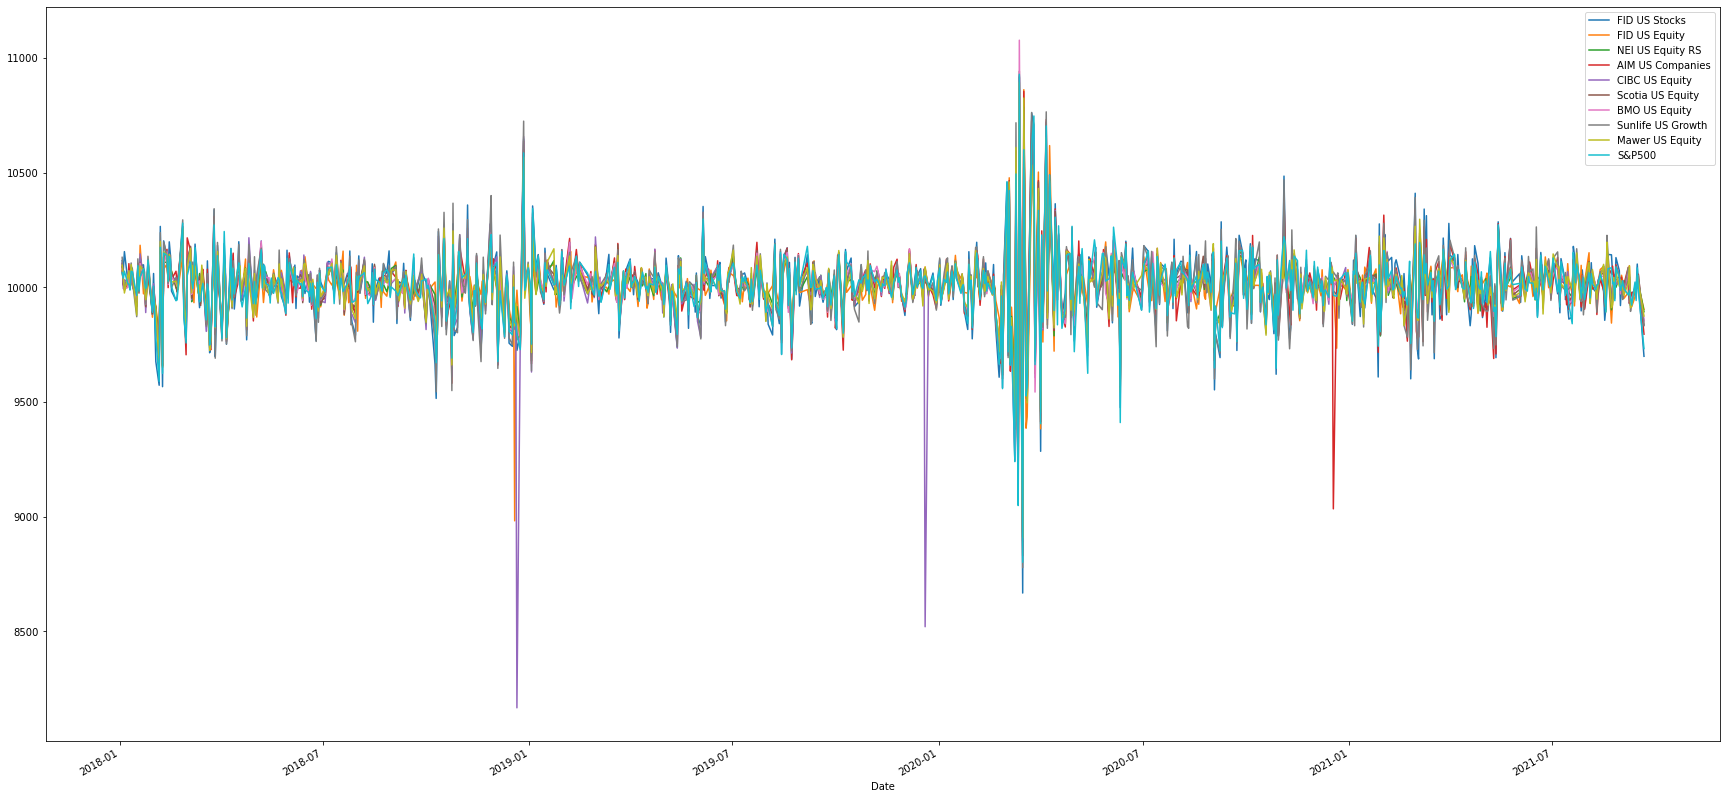

In [44]:
growth_10k.plot(figsize=(30,15))